In [1]:
import cv2
import sys 
from glob import glob
import pickle
sys.path.append("/home/ict1234/Desktop/panorama")
from config.read_config import config_

PATH_CFG = config_("/home/ict1234/Desktop/panorama/config/path.yaml")

img = cv2.imread("/home/ict1234/Desktop/panorama/data/GH011110/FHD/fhd_910.jpg") # 이미지 파일 불러들이기

In [2]:
(371,550), (76,649), (1547,584), (1668,543)

((371, 550), (76, 649), (1547, 584), (1668, 543))

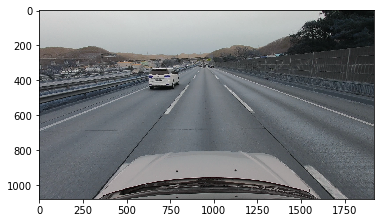

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [5]:
class homographyMat:
   
   def __init__(self):
        self.point = []
      
   def onMouse(self, event, x, y, flags, param): # 마우스 이벤트 처리 콜백 함수 구현
       if event == cv2.EVENT_LBUTTONDOWN:
           cv2.circle(img, (x,y), 3, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
           cv2.imshow('image', img)
           self.point.append([x,y])     # 마우스 좌표 저장


"""
LEFTUP, LEFT_DOWN, RIGHT_UP,RIGHT_DOWN 순으로 점찍기
"""
getPoint = homographyMat()    
cv2.setMouseCallback('image', getPoint.onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()


for i in getPoint.point:
    print(i)

error: OpenCV(4.2.0) /io/opencv/modules/highgui/src/window_QT.cpp:714: error: (-27:Null pointer) NULL window handler in function 'cvSetMouseCallback'


In [ ]:
15px = 20cm 

1px = 20/15 

In [74]:
20/15*360

480.0

In [61]:
20/15*250

333.3333333333333

In [29]:
250*(4/3)

333.3333333333333

In [30]:
4/3*360

480.0

# 정사영 시켜보기

In [5]:
left0 = (412, 530)
left1 = (7, 685)
right0 = (1428, 502)
right1 = (1820, 640)
topHeight= 600
width = img.shape[0]
height = img.shape[1]
horizontalTan = 0

down = (horizontalTan, height-horizontalTan)


left = [left0, left1]
right = [right0, right1]
up0 = (int(width/2), topHeight)
up1 = (width, int(topHeight+horizontalTan*width/2))

red = (0,0,255) # (blue,green,red) 0~255

# 좌표계 : 좌측상단(0,0), x축 오른쪽으로 증가 , y측 아래로 증가
# https://copycoding.tistory.com/145 참고
img = cv2.line(img,left0, left1, red, 2 ) # cv.line(img, pt1, pt2, 기타 옵션)  pt1 : 시작점, pt2 : 종료점
img = cv2.line(img, right0, right1, red, 2)
img = cv2.line(img, up0, up1, red, 2)
#img = cv2.line(img, down, red, 2)

cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()